In [3]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#load csv to dataframe
#URL
url = 'https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv'
df = pd.read_csv(url)

In [4]:
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
df.shape

(34857, 21)

In [6]:
#1 
df['Price'] = df['Price'].dropna().astype(int)

In [7]:
null_rows = df['Price'].isnull().sum()
null_rows

7610

In [8]:
percent_null = (null_rows / 34857) * 100
print("null rows %: ", percent_null)

null rows %:  21.83205668875692


In [9]:
#2.
# Frequency of each property type
prop_counts = df['Type'].value_counts()

# Most common property type
most_common_type = prop_counts.idxmax()

# Percentage of the most common property type
percentage_most_common = (prop_counts.max() / len(df)) * 100

print(f"The most common property type is {most_common_type}, representing {percentage_most_common:.2f}% of properties.")

The most common property type is h, representing 68.80% of properties.


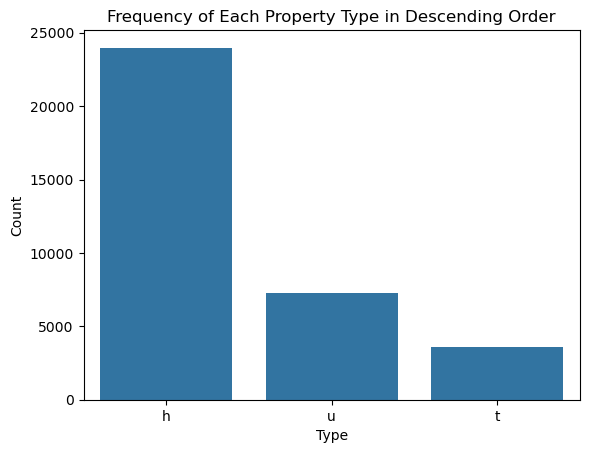

In [10]:
# 3. Plot the frequencies of property types in descending order
sns.barplot(x=prop_counts.index, y=prop_counts.values, order=prop_counts.index)
plt.title('Frequency of Each Property Type in Descending Order')
plt.ylabel('Count')
plt.xlabel('Type')
plt.show()

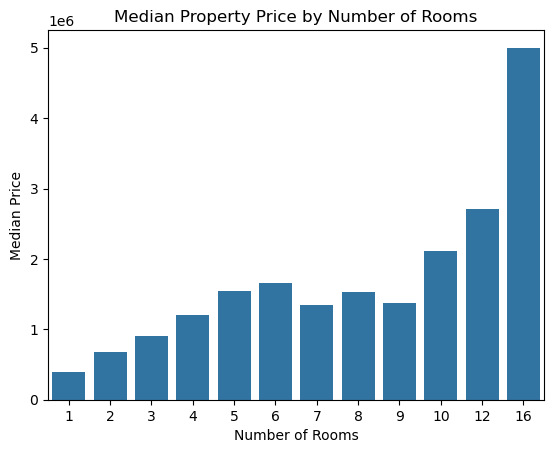

In [11]:
#4
# Group by number of rooms and calculate the median price
median_price_by_rooms = df.groupby('Rooms')['Price'].median().reset_index()

# Create a bar chart
sns.barplot(x='Rooms', y='Price', data=median_price_by_rooms)
plt.title('Median Property Price by Number of Rooms')
plt.ylabel('Median Price')
plt.xlabel('Number of Rooms')
plt.show()

In [12]:
#5. Relationship between property price and number of rooms (Spearman)
from scipy.stats import spearmanr

# Calculate Spearman correlation
corr_spearman, _ = spearmanr(df['Price'], df['Rooms'])

print(f"Spearman correlation between Price and Rooms: {corr_spearman:.2f}")

Spearman correlation between Price and Rooms: nan


In [13]:
#Spearman correlation output: nan 
#Spearman correlation coefficient cannot handle NaN values.

# Drop rows with null values in Price and Rooms
data_cleaned = df[['Price', 'Rooms']].dropna()

# Calculate Spearman correlation after handling null values
corr_spearman, _ = spearmanr(data_cleaned['Price'], data_cleaned['Rooms'])

print(f"Spearman correlation between Price and Rooms (after cleaning): {corr_spearman:.2f}")

#Moderate to strong correlation: Spearman correlation between 0.3 and 0.7.

Spearman correlation between Price and Rooms (after cleaning): 0.50


['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


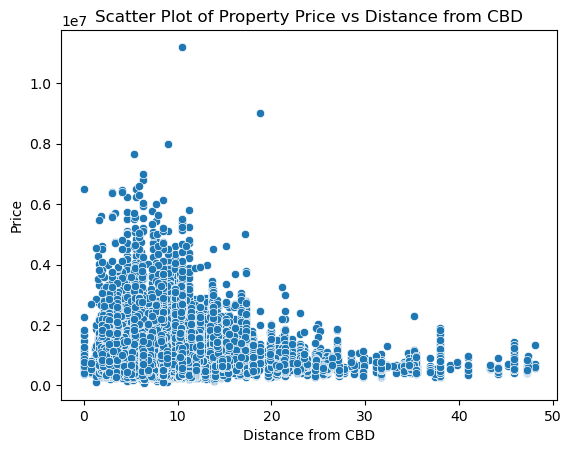

Spearman correlation between Price and CBD distance: nan


In [14]:
# 6 Relationship between CBD distance and price 
# Scatter plot of Price vs CBD distance

# Show all columns in DF as list (to find Col. about CBD)
print(list(df.columns))

sns.scatterplot(x='Distance', y='Price', data=df)
plt.title('Scatter Plot of Property Price vs Distance from CBD')
plt.ylabel('Price')
plt.xlabel('Distance from CBD')
plt.show()

# Calculate Spearman correlation between Price and CBD distance
corr_cbd, _ = spearmanr(df['Price'], df['Distance'])

print(f"Spearman correlation between Price and CBD distance: {corr_cbd:.2f}")


In [15]:
#(6. continued) Output Spearman correlation between Price and CBD distance: nan
print(df[['Price', 'Distance']].isnull().sum())

# Remove null values for Price y Distance
data_cleaned = df[['Price', 'Distance']].dropna()

# Calc correl after cleaning data
from scipy.stats import spearmanr

corr_spearman, _ = spearmanr(data_cleaned['Price'], data_cleaned['Distance'])

print(f"Spearman correlation between Price and CBD distance (after cleaning): {corr_spearman:.2f}")
#Output : -0.19.


Price       7610
Distance       1
dtype: int64
Spearman correlation between Price and CBD distance (after cleaning): -0.19


In [16]:

#after cleaning one by one in several Qs
df_clean = df.dropna()

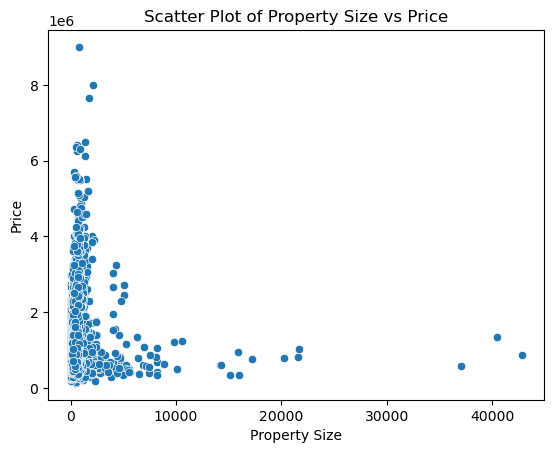

Spearman correlation between Property Size and Price: 0.29


In [17]:
# 7. 
# Scatter plot of Property Size vs Property Price
sns.scatterplot(x='Landsize', y='Price', data=df_clean)
plt.title('Scatter Plot of Property Size vs Price')
plt.ylabel('Price')
plt.xlabel('Property Size')
plt.show()

# Calculate Spearman correlation between Property Size and Price
corr_size, _ = spearmanr(df_clean['Price'], df_clean['Landsize'])

print(f"Spearman correlation between Property Size and Price: {corr_size:.2f}")
# Weak positive correlation


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8748\2333805789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Size_Category'] = pd.qcut(df_clean['Landsize'], q=7)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8748\2333805789.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_price_by_size = df_clean.groupby('Size_Category')['Price'].median().reset_index()


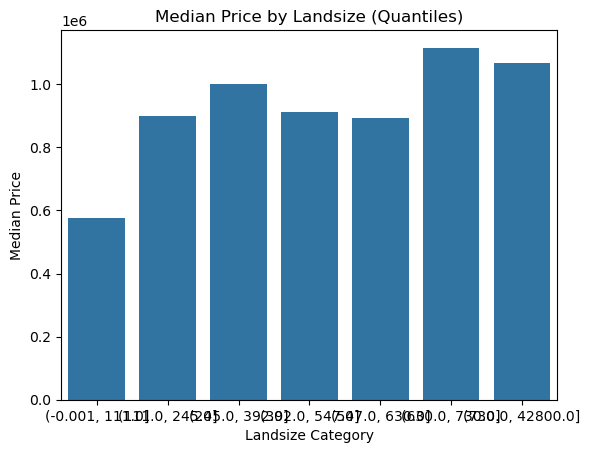

In [18]:
#8.Using quantile-based discretization
# Categorize land size into 7 quantiles
df_clean['Size_Category'] = pd.qcut(df_clean['Landsize'], q=7)

# Calculate median price for each land size category
median_price_by_size = df_clean.groupby('Size_Category')['Price'].median().reset_index()

# Create a bar plot for median price by land size 
sns.barplot(x='Size_Category', y='Price', data=median_price_by_size)
plt.title('Median Price by Landsize (Quantiles)')
plt.ylabel('Median Price')
plt.xlabel('Landsize Category')
plt.show()


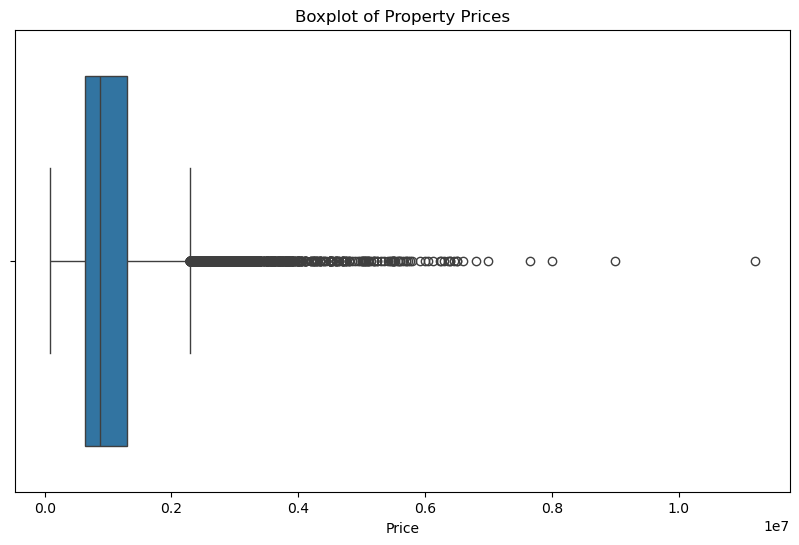

In [19]:
#9. Detecting Outliers with Tukey's Method and Box Plot
# Create a box plot for property prices to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])  
plt.title('Boxplot of Property Prices')
plt.show()

# Use Tukey's method to remove outliers
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [20]:
#(9 Cont)

# Create a new DataFrame without outliers
df_no_outliers = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# Calculate the percentage of outliers
outliers_count = len(df) - len(df_no_outliers)
outliers_percentage = (outliers_count / len(df)) * 100
print(f'Percentage of properties identified as outliers: {outliers_percentage:.2f}%')

Percentage of properties identified as outliers: 25.50%


In [21]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Q1 (25th percentile): {Q1}')
print(f'Q3 (75th percentile): {Q3}')
print(f'IQR (Interquartile Range): {IQR}')
print(f'Lower bound for outliers: {lower_bound}')
print(f'Upper bound for outliers: {upper_bound}')

# Filter out the outliers
df_no_outliers = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# Calculate the percentage of outliers
outliers_count = len(df) - len(df_no_outliers)
outliers_percentage = (outliers_count / len(df)) * 100
print(f'Percentage of properties identified as outliers: {outliers_percentage:.2f}%')

Q1 (25th percentile): 635000.0
Q3 (75th percentile): 1295000.0
IQR (Interquartile Range): 660000.0
Lower bound for outliers: -355000.0
Upper bound for outliers: 2285000.0
Percentage of properties identified as outliers: 25.50%


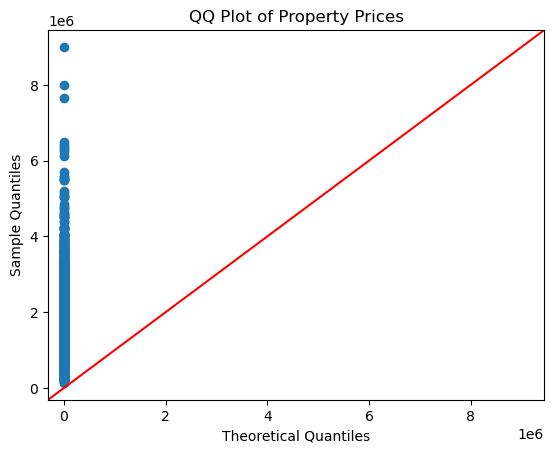

Skewness: 2.41
Kurtosis: 14.04


In [22]:
#10 Price Distribution, QQ Plot, Skewness, and Kurtosis
import statsmodels.api as sm
from scipy.stats import skew, kurtosis
# Create a QQ plot to compare the price distribution to a normal distribution
sm.qqplot(df_clean['Price'], line ='45')
plt.title('QQ Plot of Property Prices')
plt.show()

# Calculate skewness and kurtosis
price_skewness = skew(df_clean['Price'])
price_kurtosis = kurtosis(df_clean['Price'], fisher=False)
print(f'Skewness: {price_skewness:.2f}')
print(f'Kurtosis: {price_kurtosis:.2f}')

#positive Skew
#leptokurtic distribution (heavy tails)

In [23]:
#11 Kolmogorov-Smirnov test
# Perform the Kolmogorov-Smirnov test on the price distribution
from scipy.stats import kstest

ks_statistic, p_value = kstest(df['Price'], 'norm', args=(df['Price'].mean(), df['Price'].std()))
print(f'KS Statistic: {ks_statistic:.4f}, p-value: {p_value:.4f}')

# If p-value < 0.05, we reject the null hypothesis that the distribution is normal
if p_value < 0.05:
    print("The distribution of property prices is not normal.")
else:
    print("The distribution of property prices is normal.")


KS Statistic: nan, p-value: nan
The distribution of property prices is normal.


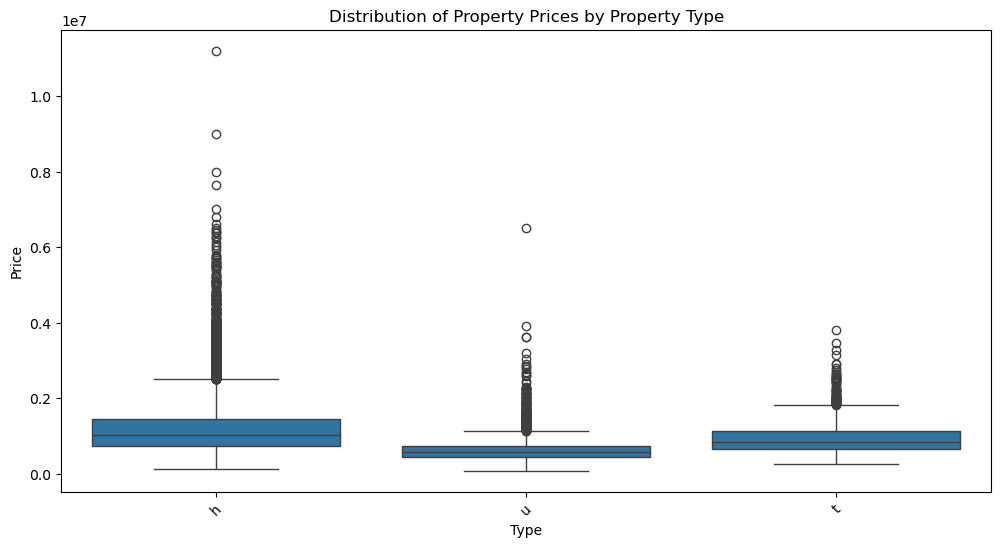

In [24]:
#12 
# Create a box plot for property prices grouped by property type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Price', data=df)  
plt.title('Distribution of Property Prices by Property Type')
plt.xticks(rotation=45)
plt.show()


In [25]:
#13
# Group by Region and calculate the median price
region_median_prices = df.groupby('Regionname')['Price'].median()

# Find the region with the highest and lowest median prices
highest_median_region = region_median_prices.idxmax()
lowest_median_region = region_median_prices.idxmin()

print(f'Region with the highest median price: {highest_median_region}')
print(f'Region with the lowest median price: {lowest_median_region}')


Region with the highest median price: Southern Metropolitan
Region with the lowest median price: Western Victoria


Chi-square statistic: 5184.71
p-value: 0.0000
Degrees of freedom: 21
Cramer's V: 0.3085

Contingency Table:
PriceCategory                Low  Medium-Low  Medium-High  High
Regionname                                                     
Eastern Metropolitan         285         803         1289   895
Eastern Victoria              61          76           27     2
Northern Metropolitan       2612        2342         1876  1034
Northern Victoria            109          36           17     4
South-Eastern Metropolitan   300         475          445   121
Southern Metropolitan       1457        1206         1789  4072
Western Metropolitan        1907        1864         1364   680
Western Victoria              90           4            2     0


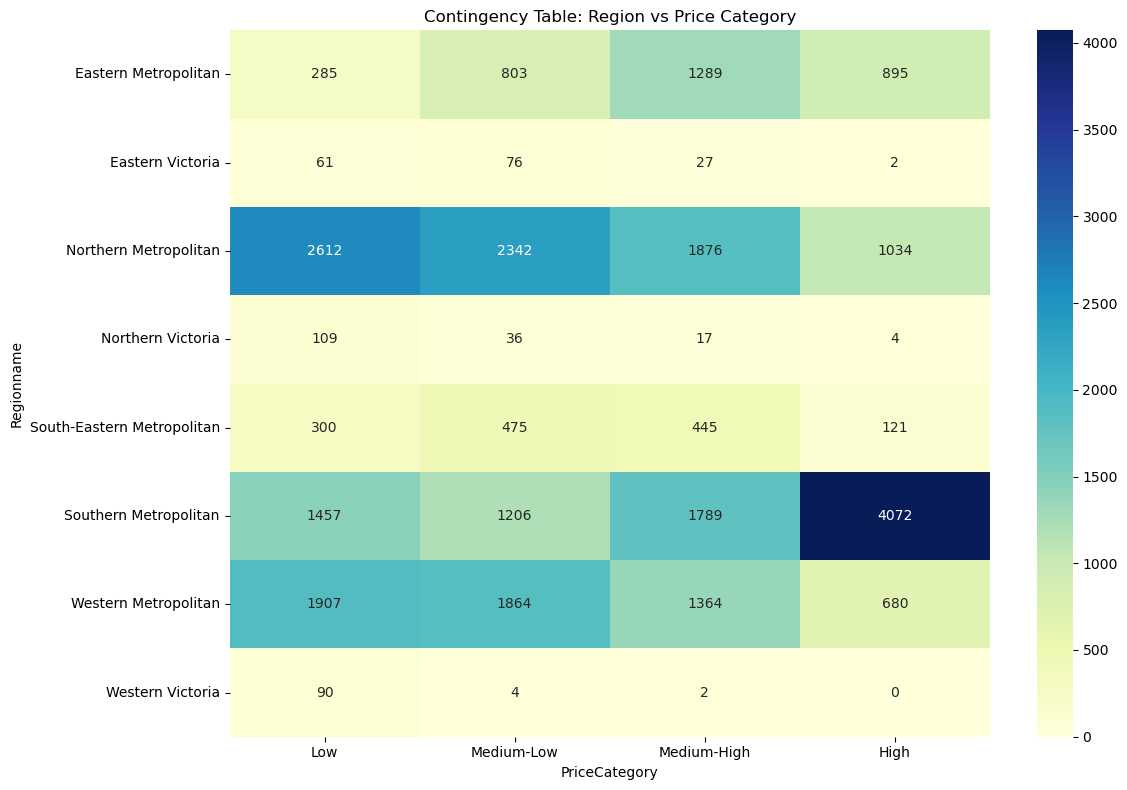

In [26]:
#14 Chi-square test for independence between Region and Price

import pandas as pd
import scipy.stats as stats
from scipy.stats import chi2_contingency
import numpy as np

# Assuming df is your DataFrame with 'Regionname' and 'Price' columns

# Discretize prices into categories
df['PriceCategory'] = pd.qcut(df['Price'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Create a contingency table
contingency_table = pd.crosstab(df['Regionname'], df['PriceCategory'])

# Perform the chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

# Calculate Cramer's V
def cramers_v(chi2, n, min_dim):
    return np.sqrt((chi2/n) / (min_dim-1))

n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v_value = cramers_v(chi2_stat, n, min_dim)

# Print results
print(f'Chi-square statistic: {chi2_stat:.2f}')
print(f'p-value: {p_val:.4f}')
print(f'Degrees of freedom: {dof}')
print(f"Cramer's V: {cramers_v_value:.4f}")

# Display the contingency table
print("\nContingency Table:")
print(contingency_table)

# Optional: Visualize the contingency table
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Contingency Table: Region vs Price Category')
plt.tight_layout()
plt.show()



In [ ]:
#16
# Extract month from the 'Date' column
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Now you can use the .dt accessor to extract the year or month, for example:
df['Year'] = df['Date'].dt.year 
df['Month'] = df['Date'].dt.month  

# Find the month with the most sales
month_with_most_sales = df['Month'].value_counts().idxmax()
print(f'Month with the most property sales: {month_with_most_sales}')
